<div style="font-family: 'Georgia', serif; background: linear-gradient(to right, #D3D3D3, #87CEFA); padding: 20px; border-radius: 15px; box-shadow: 10px 10px 5px grey; color: gray;">
    <h6 style="font-size: 20px;">Project:  IoT-based Indoor Occupancy Detections</h6>
    
</div>

# **Reading Dataset**


In [11]:
import pandas as pd
df = pd.read_csv('Occupancy.csv')

In [13]:
df.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1
1,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1
2,2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1
3,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1
4,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1


In [12]:
df.tail(20)

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
20540,2015-02-18 09:00:00,20.865000,26.865000,17.000000,1476.250000,0.004095,0
20541,2015-02-18 09:01:00,20.865000,26.865000,12.000000,1462.500000,0.004095,0
20542,2015-02-18 09:02:00,20.840000,26.840000,7.000000,1452.500000,0.004085,0
20543,2015-02-18 09:03:00,20.815000,26.815000,7.000000,1448.000000,0.004075,0
20544,2015-02-18 09:04:00,20.823333,26.823333,13.333333,1448.666667,0.004078,0
20545,2015-02-18 09:04:59,20.815000,26.815000,11.500000,1443.250000,0.004075,0
20546,2015-02-18 09:06:00,20.790000,26.790000,10.000000,1450.500000,0.004065,0
20547,2015-02-18 09:07:00,20.840000,26.840000,12.000000,1446.500000,0.004085,0
20548,2015-02-18 09:08:00,20.790000,26.790000,14.000000,1444.666667,0.004065,0
20549,2015-02-18 09:08:59,20.790000,26.767500,10.000000,1455.000000,0.004061,0


# **Importing Required Liberaries**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Analysing Dataset

In [3]:
print("Dimention of dataset: " , df.shape)

Dimention of dataset:  (20560, 7)


In [122]:
print("Dataset Columns: " ,df.columns)

Dataset Columns:  Index(['date', 'Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio',
       'Occupancy'],
      dtype='object')


In [125]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19021 entries, 99 to 20559
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           19021 non-null  object 
 1   Temperature    19021 non-null  float64
 2   Humidity       19021 non-null  float64
 3   Light          19021 non-null  float64
 4   CO2            19021 non-null  float64
 5   HumidityRatio  19021 non-null  float64
 6   Occupancy      19021 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 1.2+ MB
None


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,20560.0,20.906212,1.055315,19.000000,20.200000,20.700000,21.525000,24.408333
Humidity,20560.0,27.655925,4.982154,16.745000,24.500000,27.290000,31.290000,39.500000
Light,20560.0,130.756622,210.430875,0.000000,0.000000,0.000000,301.000000,1697.250000
CO2,20560.0,690.553276,311.201281,412.750000,460.000000,565.416667,804.666667,2076.500000
HumidityRatio,20560.0,0.004228,0.000768,0.002674,0.003719,0.004292,0.004832,0.006476
Occupancy,20560.0,0.231031,0.421503,0.000000,0.000000,0.000000,0.000000,1.000000


In [133]:
print("the count of occupancy status:\t occupied == 1 \t \\  not occupied ==0 \n\n",df["Occupancy"].value_counts())

the count of occupancy status:	 occupied == 1 	 \  not occupied ==0 

 0    15369
1     3652
Name: Occupancy, dtype: int64


Visualize the count of occupancy status:


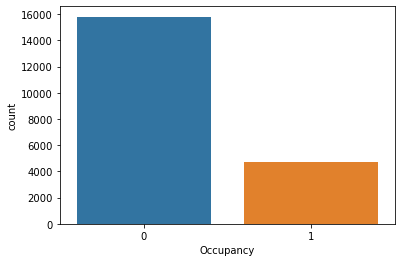

In [8]:
sns.countplot(x="Occupancy", data=df)
print("Visualize the count of occupancy status:")

In [138]:
print("Finding the count of missing values:\n",df.isnull().sum())

Finding the count of missing values:
 date             0
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64


# **Analysing histogram**

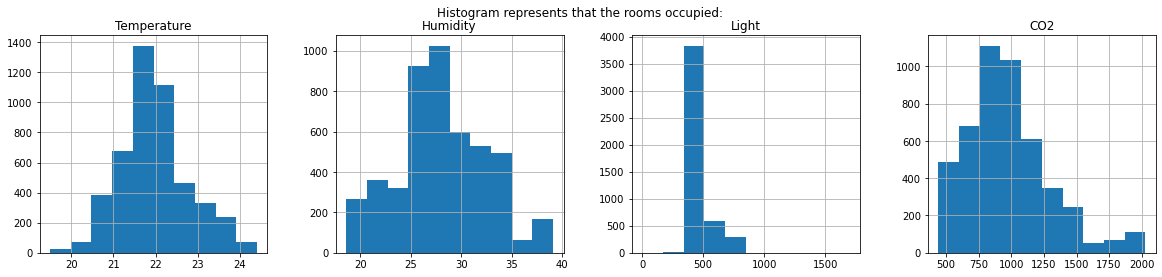

In [31]:
f, ax = plt.subplots(nrows=1, ncols=4, figsize=(20, 4))
features = ["Temperature", "Humidity","Light","CO2"]
f.suptitle('Histogram represents that the rooms occupied:')
df[df["Occupancy"]==1][features].hist(figsize=(15, 10),ax=ax);

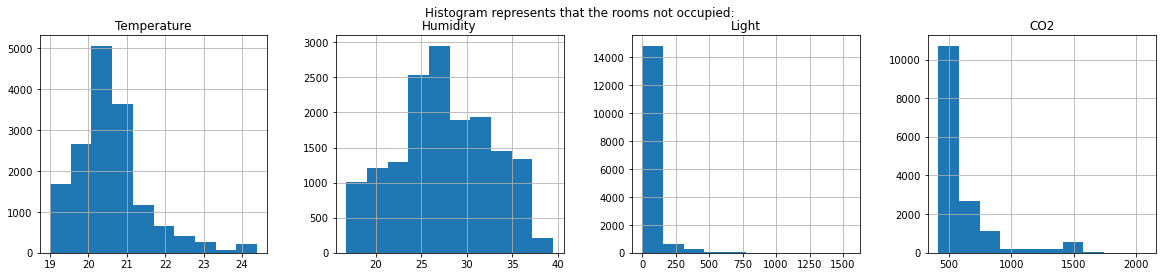

In [32]:
f, ax = plt.subplots(nrows=1, ncols=4, figsize=(20, 4))
features = ["Temperature", "Humidity","Light","CO2"]
f.suptitle('Histogram represents that the rooms not occupied:')
df[df["Occupancy"]==0][features].hist(figsize=(15, 10),ax=ax);

# **Analyzing a boxplot and violin plot [Temperature]**

In [33]:
print(df["Temperature"].describe())

count    20560.000000
mean        20.906212
std          1.055315
min         19.000000
25%         20.200000
50%         20.700000
75%         21.525000
max         24.408333
Name: Temperature, dtype: float64


the Figures below Visualize temperature using BoxPlot and ViolinPlot when the room is occupied


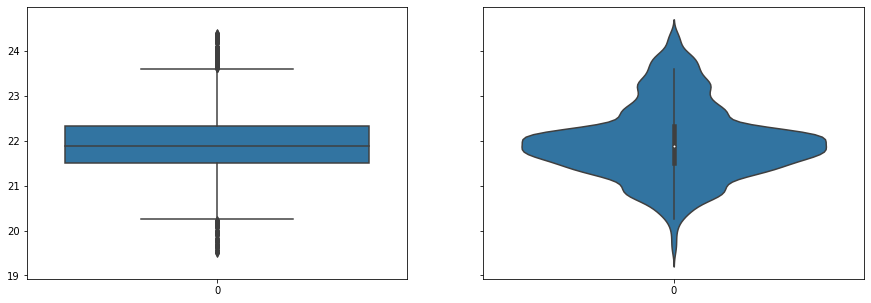

In [34]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 5))

print("the Figures below Visualize temperature using BoxPlot and ViolinPlot when the room is occupied")
sns.boxplot(data=df[df["Occupancy"]==1]["Temperature"], ax=axes[0]);
sns.violinplot(data=df[df["Occupancy"]==1]["Temperature"], ax=axes[1]);

the Figures below Visualize temperature using BoxPlot and ViolinPlot when room is not occupied


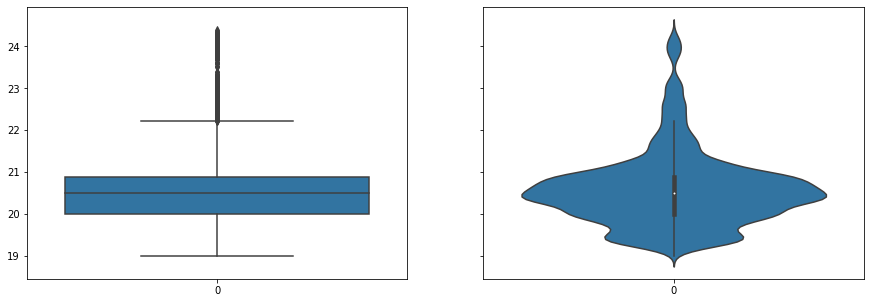

In [18]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 5))
print("the Figures below Visualize temperature using BoxPlot and ViolinPlot when room is not occupied")
data=df[df["Occupancy"]==0]["Temperature"].reset_index(drop = True)
sns.boxplot(data=data, ax=axes[0]);
sns.violinplot(data=data, ax=axes[1]);

# **Analyzing plot and boxplot of features regarding occupancy status**

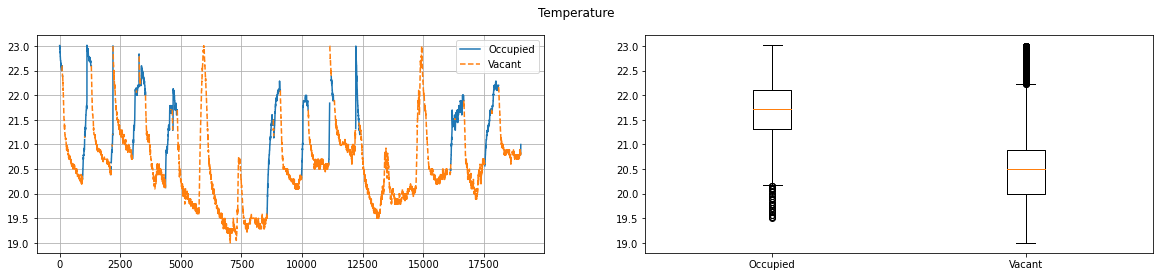

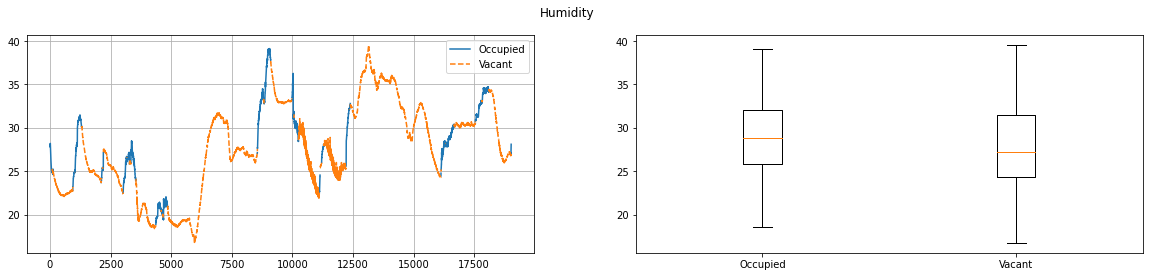

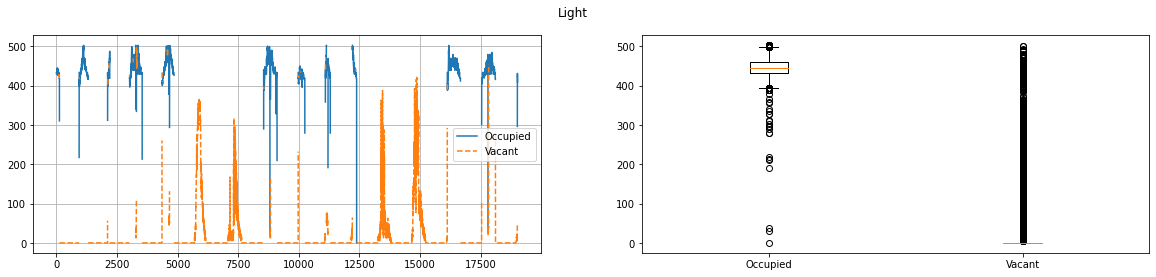

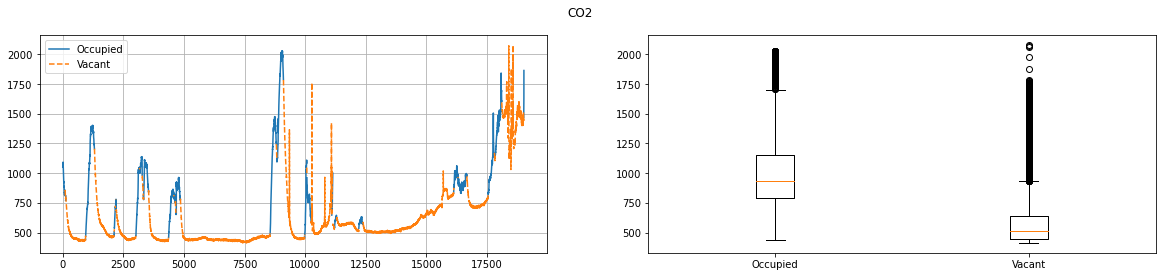

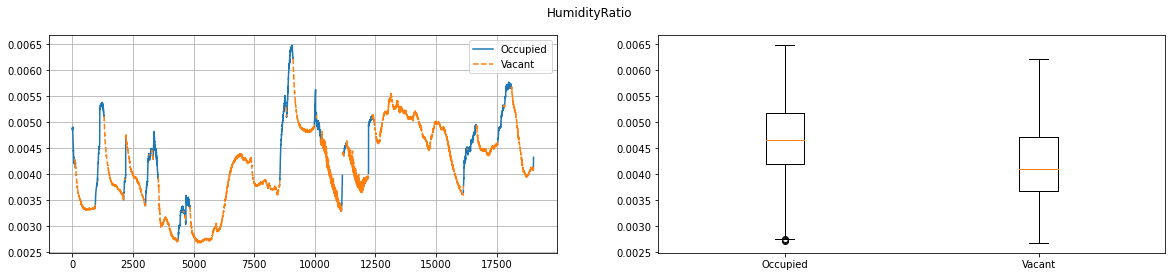

In [150]:
def occupancy_plot(df, cat):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,4))
    
    fig.suptitle(cat)
    ax1.plot(np.where(df.Occupancy==1, df[cat], None), label='Occupied')
    ax1.plot(np.where(df.Occupancy==0, df[cat], None), label='Vacant', ls='--')
    ax1.grid()
    ax1.legend()
    
    ax2.boxplot([df[cat][df.Occupancy==1], df[cat][df.Occupancy==0]])
    ax2.set_xticklabels(['Occupied', 'Vacant'])
    
for i in range(1, 6):
    occupancy_plot(df, df.columns[i])

# **Removing outliers**

In [37]:
df2 = df
df2 = df2[np.abs(df2.Temperature - df2.Temperature.mean()) <= 2*df2.Temperature.std()]
print("Removing the Outliers from 'Temperature' has reduced the data size of data from {} to {}.".format(len(df), len(df2)))

Removing the Outliers from 'Temperature' has reduced the data size of data from 20560 to 19593.


In [38]:
df = df2[np.abs(df2.Light - df2.Light.mean()) <= 2*df2.Light.std()]
print("Removing the Outliers from 'Light' has reduced the data size of data from {} to {}.".format(len(df2), len(df)))

Removing the Outliers from 'Light' has reduced the data size of data from 19593 to 19021.


In [39]:
df2 = df[np.abs(df.CO2 - df.CO2.mean()) <= 2*df2.CO2.std()]
print("Removing the Outliers from 'CO2' has reduced the data size of data from {} to {}.".format(len(df), len(df2)))

Removing the Outliers from 'CO2' has reduced the data size of data from 19021 to 17542.


# **Analyzing boxplots before & after removing outliers**



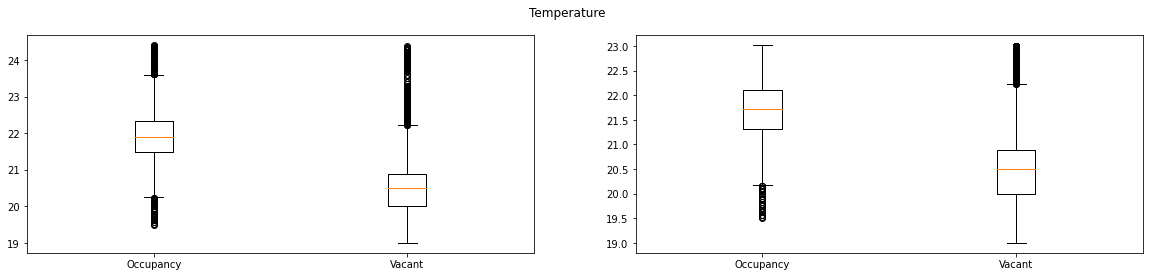

In [42]:
dfOriginal = pd.read_csv('Occupancy.csv')
def compare_Boxplots(df,dfOriginal, categories):
    for cat in categories:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,4))

        fig.suptitle(cat)
        ax1.boxplot([dfOriginal[cat][dfOriginal.Occupancy==1], dfOriginal[cat][dfOriginal.Occupancy==0]])
        ax1.set_xticklabels(['Occupancy', 'Vacant'])

        ax2.boxplot([df[cat][df.Occupancy==1], df[cat][df.Occupancy==0]])
        ax2.set_xticklabels(['Occupancy', 'Vacant'])
    
compare_Boxplots(df,dfOriginal, ["Temperature"])

# **Correlation Matrix**



,Occupancy,CO2,Humidity,Light,Temperature,HumidityRatio
Occupancy,1.000000,0.504024,0.089649,0.944423,0.549369,0.259440
CO2,0.504024,1.000000,0.318258,0.473939,0.507903,0.478912
Humidity,0.089649,0.318258,1.000000,0.052276,-0.088715,0.954310
Light,0.944423,0.473939,0.052276,1.000000,0.619730,0.239386
Temperature,0.549369,0.507903,-0.088715,0.619730,1.000000,0.208373
HumidityRatio,0.259440,0.478912,0.954310,0.239386,0.208373,1.000000


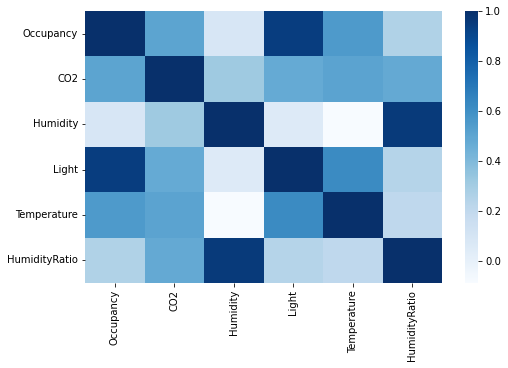

In [47]:
_, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 5))
numerical = list(set(df.columns)- {"date"})
corr_matrix = df[numerical].corr()
sns.heatmap(corr_matrix,ax=axes ,cmap="Blues");
corr_matrix

# **Machine Learning methods**


1. Logistic Regression
2. Decision Tree
3. K-Nearest Neighbors
4. Naive Bayes



In [49]:
X, Y = df2.iloc[:,1:-1], df2.iloc[:,-1]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [93]:
result = pd.DataFrame(columns=['Classifier','True Negative', 'False Postive', 'False Negative', 'True Positive', 'Classifier Accuracy'])

def accuracy_vis(xtest, ytest, ypred):
    fig, ax1 = plt.subplots(1, 1, figsize=(7,4))
    
    # Confusion Matrix Visualization
    cm = confusion_matrix(ytest, ypred)
    x_axis_labels = ['Actual Postive', 'Actual Negative']
    y_axis_labels = ['Predicted Postive', 'Predicted Negative']
    sns.heatmap(cm, fmt=".0f", annot=True, linewidths=.5, ax=ax1,cmap="YlGnBu", xticklabels=x_axis_labels)
    ax1.set_yticklabels(y_axis_labels, rotation=0, ha='right')

    plt.show()
    return confusion_matrix(ytest, ypred).ravel()


In [85]:
lr = LogisticRegression()
lr.fit(X_train, Y_train)

LogisticRegression()

Accuracy of Logistic Regression Classifier 99.110807%


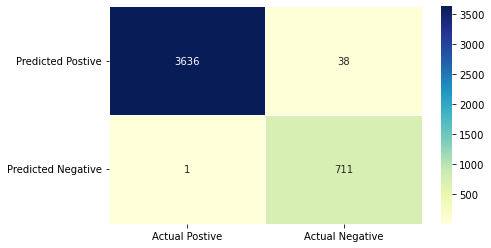

In [139]:
Y_pred = lr.predict(X_test)
lr_score = lr.score(X_test, Y_test)
predit_proba = lr.predict_proba(X_test)
print('Accuracy of Logistic Regression Classifier {:.6f}%'.format(lr_score* 100))
tn, fp, fn, tp = accuracy_vis(X_test, Y_test, Y_pred) 
result.loc['LR'] = ['Logistic Regression', tn, fp, fn, tp, round(lr_score * 100, 6)]

In [75]:
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)

DecisionTreeClassifier()

Accuracy of Decision Tree Classifier on test set: 99.156407%


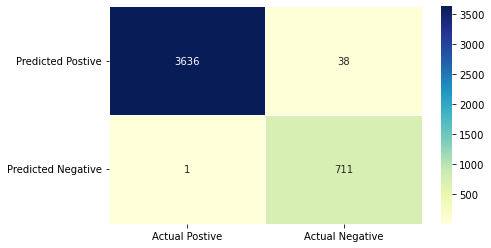

In [140]:
Y_pred= lr.predict(X_test)
lr_score =  lr.score(X_test, Y_test)
predit_proba = lr.predict_proba(X_test)
print('Accuracy of Decision Tree Classifier on test set: {:.6f}%'.format(dt_score* 100))
tn, fp, fn, tp = accuracy_vis(X_test, Y_test, Y_pred) 
result.loc['DT'] = ['Decision Tree', tn, fp, fn, tp, round(dt_score* 100, 6)]

In [107]:
knn = KNeighborsClassifier(metric='euclidean')
knn.fit(X_train, Y_train)

KNeighborsClassifier(metric='euclidean')

Accuracy of K Nearest Neighbors Classifier on test set: 99.110807%


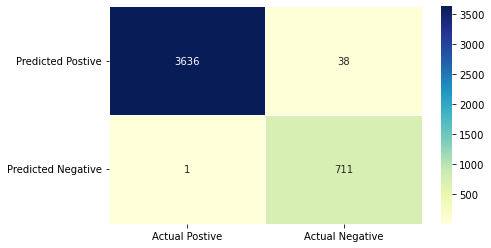

In [141]:
Y_pred= lr.predict(X_test)
lr_score =  lr.score(X_test, Y_test)
predit_proba = lr.predict_proba(X_test)
print('Accuracy of K Nearest Neighbors Classifier on test set: {:.6f}%'.format(knn_score* 100))
tn, fp, fn, tp = accuracy_vis(X_test, Y_test, Y_pred) 
result.loc['KNN'] = ['K Nearest Neighbors', tn, fp, fn, tp, round(knn_score* 100, 6)]

In [79]:
nb = GaussianNB()
nb.fit(X_train, Y_train)

GaussianNB()

Accuracy of Naive Bayes Classifier on test set: 98.381213%


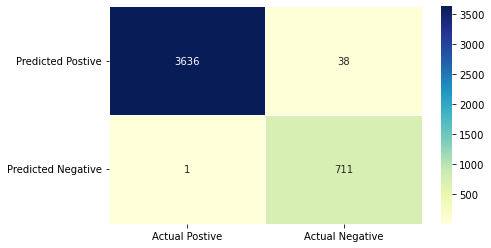

In [142]:
Y_pred= lr.predict(X_test)
lr_score =  lr.score(X_test, Y_test)
predit_proba = lr.predict_proba(X_test)
print('Accuracy of Naive Bayes Classifier on test set: {:.6f}%'.format(nb_score* 100))
tn, fp, fn, tp = accuracy_vis(X_test, Y_test, Y_pred) 
result.loc['NB'] = ['Naive Bayes', tn, fp, fn, tp, round(nb_score* 100, 6)]

# **Comparing performance of Machine Learning methods**

In [144]:
dfNew=result.copy()
result.sort_values('Classifier Accuracy')

,Classifier,True Negative,False Postive,False Negative,True Positive,Classifier Accuracy
NB,Naive Bayes,3636,38,1,711,98.381213
LR,Logistic Regression,3636,38,1,711,99.110807
KNN,K Nearest Neighbors,3636,38,1,711,99.110807
DT,Decision Tree,3636,38,1,711,99.156407
